# Goal: Visualize NYC Marathon Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [2]:
nyc_data = pd.read_csv('marathon-data.csv')
nyc_data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [3]:
nyc_data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [4]:
import datetime

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

In [5]:
nyc_data = pd.read_csv('marathon-data.csv', converters={'split':convert_time, 'final':convert_time})
nyc_data['split_sec'] = nyc_data['split'].astype(int) / 1E9
nyc_data['final_sec'] = nyc_data['final'].astype(int) / 1E9

print nyc_data.dtypes
nyc_data.describe()

age                    int64
gender                object
split        timedelta64[ns]
final        timedelta64[ns]
split_sec            float64
final_sec            float64
dtype: object


,age,split,final,split_sec,final_sec
count,37250.000000,37250,37250,37250.000000,37250.000000
mean,40.697369,0 days 02:03:54.425664,0 days 04:48:09.303597,7434.425664,17289.303597
std,10.220043,0 days 00:22:55.093889,0 days 01:03:32.145345,1375.093890,3812.145345
min,17.000000,0 days 01:05:21,0 days 02:08:51,3921.000000,7731.000000
25%,33.000000,0 days 01:48:25,0 days 04:02:24,6505.000000,14544.000000
50%,40.000000,0 days 02:01:13,0 days 04:44:25,7273.000000,17065.000000
75%,48.000000,0 days 02:16:11,0 days 05:27:36,8171.000000,19656.000000
max,86.000000,0 days 04:59:49,0 days 10:01:08,17989.000000,36068.000000


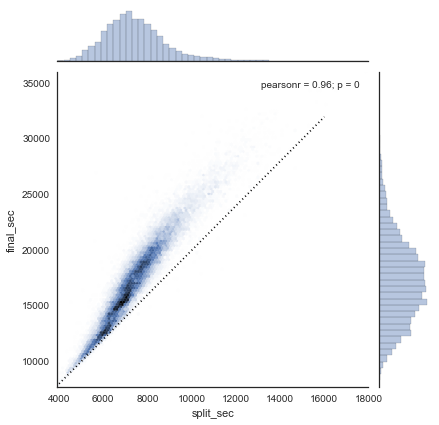

In [6]:
with sns.axes_style('white'):
    g = sns.jointplot('split_sec', 'final_sec', nyc_data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000), np.linspace(8000, 32000), ':k'); #blac(k) dotted(:) line

In [7]:
# test for negative split
nyc_data['split_frac'] = 1 - 2*nyc_data['split_sec'] / nyc_data['final_sec']
print "Count of negative splits: ", sum(nyc_data.split_frac < 0) # count of negative splits
nyc_data.describe()

Count of negative splits:  251


,age,split,final,split_sec,final_sec,split_frac
count,37250.000000,37250,37250,37250.000000,37250.000000,37250.000000
mean,40.697369,0 days 02:03:54.425664,0 days 04:48:09.303597,7434.425664,17289.303597,0.130887
std,10.220043,0 days 00:22:55.093889,0 days 01:03:32.145345,1375.093890,3812.145345,0.061825
min,17.000000,0 days 01:05:21,0 days 02:08:51,3921.000000,7731.000000,-0.237000
25%,33.000000,0 days 01:48:25,0 days 04:02:24,6505.000000,14544.000000,0.088254
50%,40.000000,0 days 02:01:13,0 days 04:44:25,7273.000000,17065.000000,0.134711
75%,48.000000,0 days 02:16:11,0 days 05:27:36,8171.000000,19656.000000,0.175026
max,86.000000,0 days 04:59:49,0 days 10:01:08,17989.000000,36068.000000,0.579326


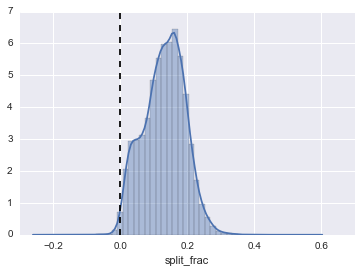

In [8]:
sns.distplot(nyc_data['split_frac']); # histogram + kdeplot
plt.axvline(0, color="k", linestyle="--");

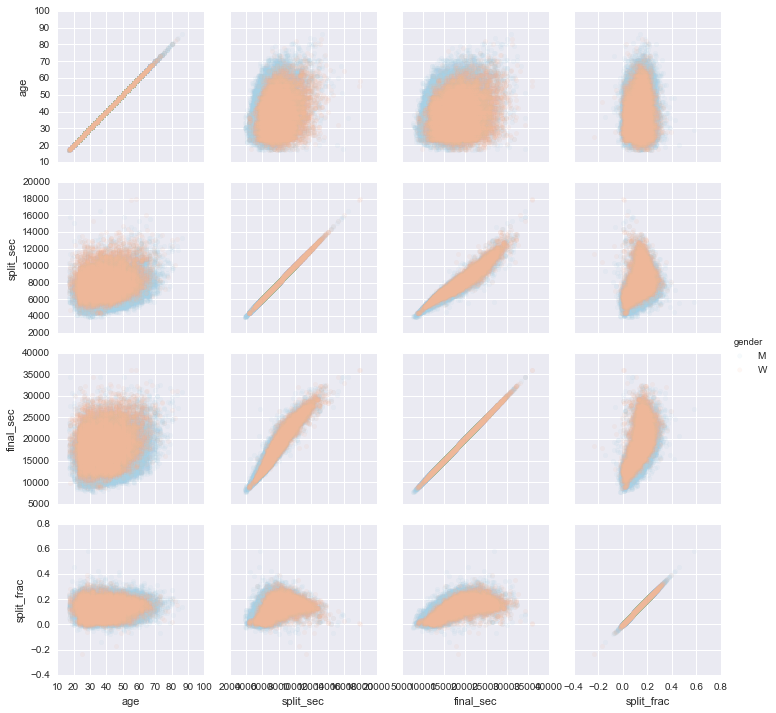

In [9]:
g = sns.PairGrid(nyc_data, vars=['age', 'split_sec', 'final_sec', 'split_frac'], hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.1)
g.add_legend();

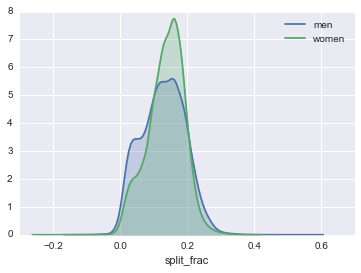

In [10]:
sns.kdeplot(nyc_data.split_frac[nyc_data.gender=='M'], label='men', shade=True)
sns.kdeplot(nyc_data.split_frac[nyc_data.gender=='W'], label='women', shade=True)
plt.xlabel('split_frac');

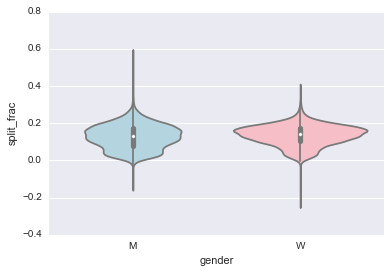

In [11]:
#compare distributions
sns.violinplot("gender", "split_frac", data=nyc_data, palette=["lightblue", "lightpink"]);

In [12]:
nyc_data['age_dec'] = nyc_data.age.map(lambda age: 10*(age // 10))
men = (nyc_data.gender == 'M')
women = (nyc_data.gender == 'W')
print nyc_data.head()
print nyc_data[women].head()

   age gender    split    final  split_sec  final_sec  split_frac  age_dec
0   33      M 01:05:38 02:08:51     3938.0     7731.0   -0.018756       30
1   32      M 01:06:26 02:09:28     3986.0     7768.0   -0.026262       30
2   31      M 01:06:49 02:10:42     4009.0     7842.0   -0.022443       30
3   38      M 01:06:16 02:13:45     3976.0     8025.0    0.009097       30
4   31      M 01:06:32 02:13:59     3992.0     8039.0    0.006842       30
    age gender    split    final  split_sec  final_sec  split_frac  age_dec
28   34      W 01:12:35 02:24:13     4355.0     8653.0   -0.006587       30
30   39      W 01:13:13 02:25:37     4393.0     8737.0   -0.005608       30
32   29      W 01:13:09 02:25:50     4389.0     8750.0   -0.003200       20
40   36      W 01:12:57 02:28:13     4377.0     8893.0    0.015630       30
41   27      W 01:13:07 02:28:27     4387.0     8907.0    0.014932       20


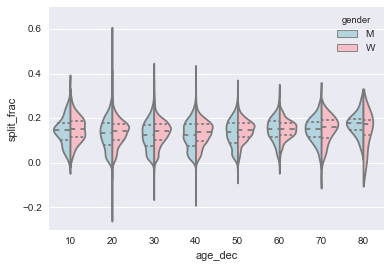

In [13]:
with sns.axes_style(style=None):
    sns.violinplot("age_dec", "split_frac", hue="gender", data=nyc_data,
                   split=True, inner="quartile", palette=["lightblue", "lightpink"]);

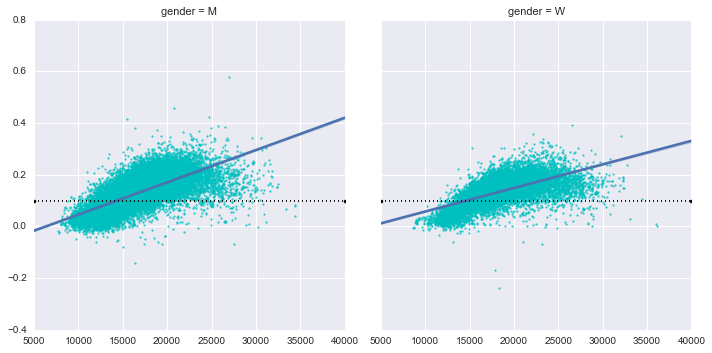

In [14]:
#men age 20-50 different from women of same age
g = sns.lmplot('final_sec', 'split_frac', col='gender', data=nyc_data, markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");